In [115]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys

An analysis of exercises in Chapter 1 of the numpy "Beginners Book Second Edition" By Ivan Idris.   

####  Arrays

In [10]:
def pythonsum(n):
    a = list(range(n))
    b = list(range(n))
    c = []
    for i in range(len(a)):
        a[i] = i ** 2
        b[i] = i ** 3
        c.append(a[i] + b[i])
    return c

In [11]:
pythonsum(10)

[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [12]:
def numpysum(n):
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    c = a + b
    return c

In [13]:
numpysum(10)

array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

**Right here I decided to run some tests on my own**

In [165]:
def run_test(size):
    start = datetime.now()
    c = pythonsum(10)
    delta = datetime.now() - start
    print("The last two elements of the sum: {}".format(c[-2:]))
    print("PythonSum elapsed time in microseconds: {}".format(delta.microseconds))
    start = datetime.now()
    c = numpysum(10)
    delta = datetime.now() - start
    print("The last two elements of the sum: {}".format(c[-2:]))
    print("NumpySum elapsed time in microseconds: {}".format(delta.microseconds))

def run_multi_test(limit, test_for='numpy'):
    '''My Code'''
    for x in range(limit):
        x = x + 1
        start = datetime.now()
        c = pythonsum(x)
        psum_delta = datetime.now() - start
        start = datetime.now()
        c = numpysum(x)
        nsum_delta = datetime.now() - start
        if test_for == 'numpy':
            if nsum_delta.microseconds < psum_delta.microseconds:
                return(limit, x, nsum_delta, psum_delta)
        elif test_for == 'python':
            if nsum_delta.microseconds > psum_delta.microseconds:
                return(limit, x, nsum_delta, psum_delta)
    return(limit, 0, 0, 0)

def plot_results(num_tests, num):
    '''My Code'''
    tests = list(range(num_tests))
    breaks = []
    breaks2 = []
    for x in range(len(tests)):
        limit,break_point,ndelta,pdelta = run_multi_test(tests[x])
        breaks.append(break_point)
        limit,break_point,ndelta,pdelta = run_multi_test(tests[x], test_for='python')
        breaks2.append(break_point)
    plt.plot(tests, breaks, color='grey', label='numpy')
    plt.plot(tests, breaks2, color='red', label='python')
    plt.title('Numpy and Python array comparison')
    plt.xlabel('iterate')
    plt.ylabel('breach')
    if max(breaks) > max(breaks2):
        high = max(breaks)
    else:
        high = max(breaks2)
    plt.yticks(range(high))
    plt.legend(loc='best')
    plt.show()

In [117]:
%matplotlib inline

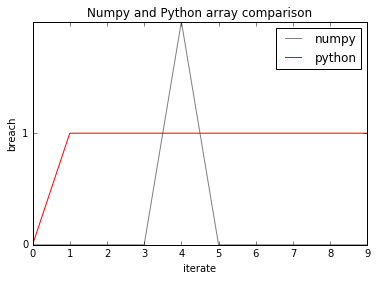

In [159]:
plot_results(10, 10)

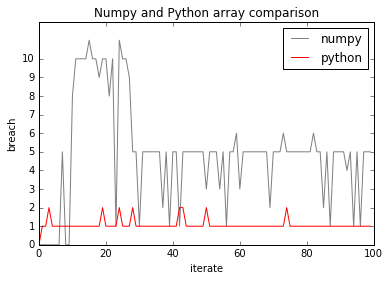

In [161]:
plot_results(100,100)

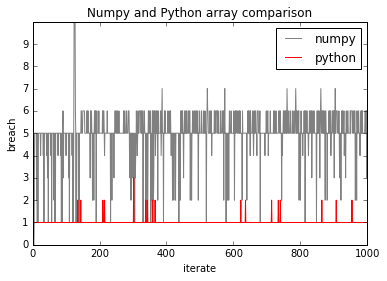

In [160]:
plot_results(1000,1000)

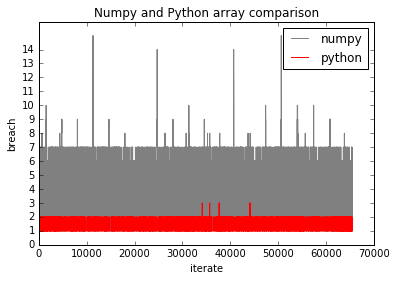

In [162]:
plot_results(65534,65534)

** Aha!, Occam's Razor!  I have found it!**  
https://en.wikipedia.org/wiki/Occam's_razor  

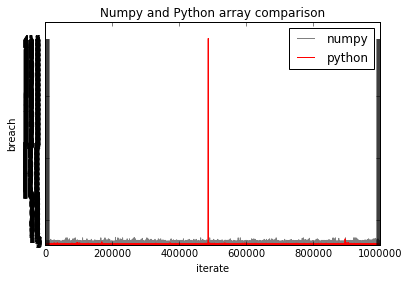

In [164]:
plot_results(1000000,1000000)

**We'll need it Occam!  
An overflow occurred near test 480000.  
The yticks have flooded to both sides of the chart.**